<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/Methods_Comparison_suppfig1B_Sample_Composition_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ran 20230421
# FixNCUT PRJNA978570 vs. GSE180212, GSE141017
# SuppFig1B


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Instaling Packages

In [ ]:
!pip install cloudpickle==1.3.0 sccoda scanpy anndata leidenalg pandas==1.5.3 umap-learn==0.5.1 sklearn==0.0.post5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 7.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76548 sha256=547d02933c3fdfd1e2af405901ed5cbd7bc0876cbb1d068997c4f140492f2721
  Stored in directory

In [ ]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 122545 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [ ]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 2s (775 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be 

In [ ]:
%%capture
%%!
git clone https://github.com/has2k1/scikit-misc.git
cd scikit-misc
python setup.py install

In [ ]:
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


#Load font

In [ ]:
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
print(fm.findfont('Arial'))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


# Setup

In [ ]:
folder='/content/drive/MyDrive/CIP_v3_data/Methods_Comparison/'
samplename="Methods_Comparison_v3"
random_state=42

import os
os.chdir(folder)
if not os.path.exists('./figures'):
    os.makedirs('./figures')

# sample composition

In [ ]:
# Setup
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import numpy as np

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz
import scanpy as sc
import scanpy.external as sce
import seaborn as sb
import matplotlib
import matplotlib.pyplot as pl

In [ ]:
pd.set_option('display.max_rows', 10000000)

In [ ]:
pwd

'/content/drive/MyDrive/CIP_v3_data/Methods_Comparison'

In [ ]:
#load annoatated dataset from previous analysis
adata = sc.read('/content/drive/MyDrive/CIP_v3_data/Methods_Comparison/Methods_Comparison_v3_QCfilteredNormalized_Harmony_Triku_Neighbors_annotated_20230221.h5ad')
adata

AnnData object with n_obs × n_vars = 33906 × 19596
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'condition', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'Acinar', 'ADM', 'Ductal', 'leiden_r0.1', 'annotated', 'annotated2'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variable'
    uns: 'QC_colors', 'a

In [ ]:
color_dict={
    'Acinar':'#D62728',
    'ADM-late': '#FF7F0E',
    'ADM-early': '#E377C2',
    'Macrophage / DC': '#4060C8',
    'Fibroblast': '#7AAA6F',
    'Endothelial':'#F4BB44',
    'Neutrophil': '#A1C2ED',
    'Ductal': '#AA40FC',
    'B': '#17BECF',
    'T / NK': '#6996E3',
    'Pericyte': '#CF9FFF',
    'Endocrine': '#8C564B',
    'Schwann': '#C49C94',
    'Mesothelial': '#355E3B',
    'Fibroblast2':'#D3D3D3',
    'RBC':'#FF7F6B',}
category_colors = []
for category in adata.obs['annotated2'].cat.categories:
    color = color_dict[category]
    category_colors.append(color)

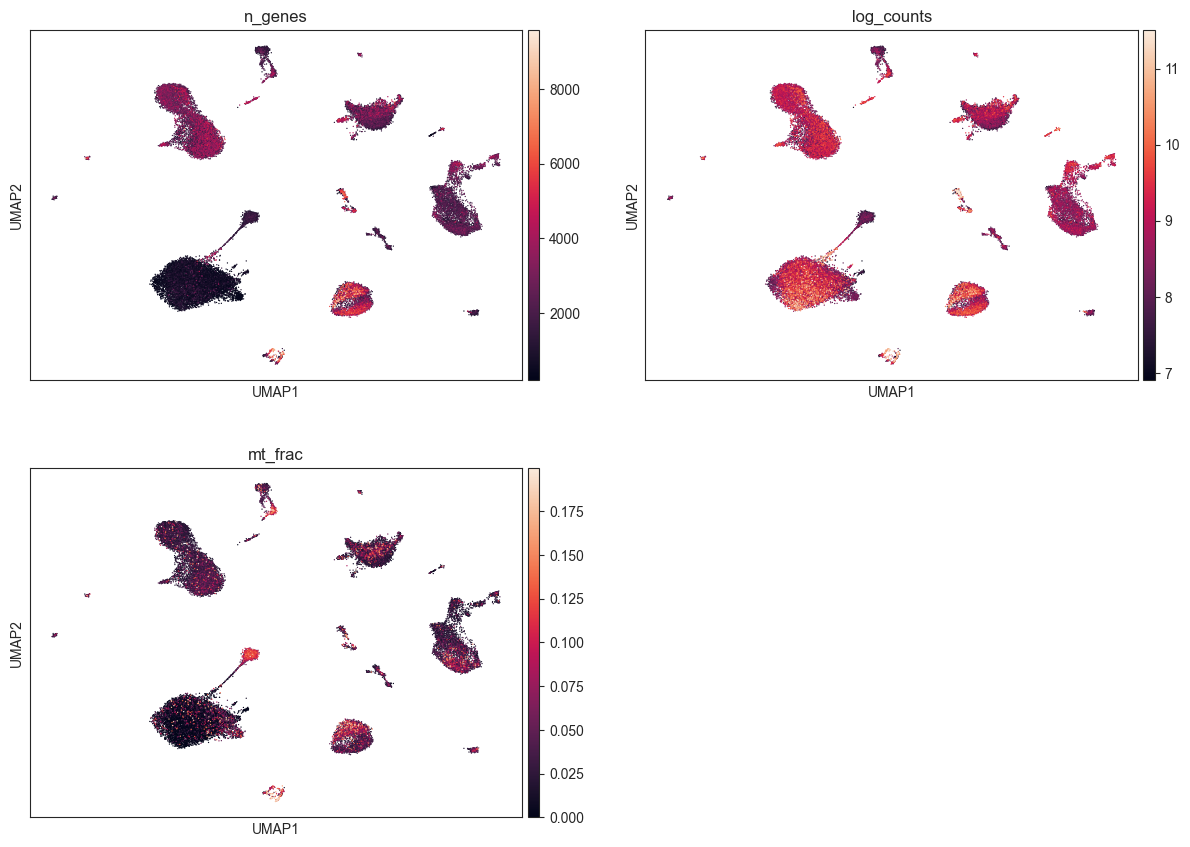

In [ ]:
genes_to_plot = ['n_genes','log_counts','mt_frac']
sc.pl.umap(adata, color = genes_to_plot,ncols=2)


In [ ]:
##change sample names
adata.obs['sample'] = adata.obs['sample'].replace('Protocol1', 'GSE180212')
adata.obs['sample'] = adata.obs['sample'].replace('Protocol2', 'GSE141017')

In [ ]:
##change B to B-cell
adata.obs['annotated'] = adata.obs['annotated'].replace('B', 'B-cell')
adata.obs['annotated2'] = adata.obs['annotated2'].replace('B', 'B-cell')

In [ ]:
adata.obs['sample'].value_counts()

FixNCut      20020
GSE180212     7265
GSE141017     6621
Name: sample, dtype: int64

In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/CellRanger_7_Data/W7_CIP/Methods_Comparison_v3_donors_final.csv', sep = ',', index_col = 0)


In [ ]:
metadata2 = pd.read_csv('/content/drive/MyDrive/CellRanger_7_Data/W7_CIP/Methods_Comparison_v3_samples.csv', sep = ',', index_col = 0)


In [ ]:
metadata

,sample,condition
donor,,
control_1,FixNCut,Control
control_2,FixNCut,Control
control_3,FixNCut,Control
control_4,FixNCut,Control
control_5,FixNCut,Control
P_1,GSE180212,Control
S_1,GSE141017,Control
S_2,GSE141017,Control
S_3,GSE141017,Control


In [ ]:
metadata2

,condition
sample,
FixNCut,Control
GSE180212,Control
GSE141017,Control


#annotated2

In [ ]:
colors_time=[ '#D8527C',  '#8EB3EA', '#4E72D1']

In [ ]:
fm.rcParams['font.family']=['Arial']

In [ ]:
adata.obs['annotated2']= adata.obs['annotated2'].cat.reorder_categories(['Acinar','Macrophage / DC','Fibroblast',
                                                                       'Endothelial','Ductal','T / NK','B-cell',
                                                                 'Endocrine','Pericyte','RBC','Schwann','Mesothelial','Fibroblast2'])

In [ ]:
data_scanpy_1 = dat.from_scanpy(
    adata,
    cell_type_identifier="annotated2",
    sample_identifier="donor",
    covariate_df=metadata
)
print(data_scanpy_1)

AnnData object with n_obs × n_vars = 10 × 13
    obs: 'sample', 'condition'
    var: 'n_cells'


In [ ]:
data_scanpy_2 = dat.from_scanpy(
    adata,
    cell_type_identifier="annotated2",
    sample_identifier="sample",
    covariate_df=metadata2
)
print(data_scanpy_2)

AnnData object with n_obs × n_vars = 3 × 13
    obs: 'condition'
    var: 'n_cells'


In [ ]:
data_scanpy_1.var

,n_cells
annotated2,
Acinar,9752.0
Macrophage / DC,4814.0
Fibroblast,7871.0
Endothelial,4573.0
Ductal,3335.0
T / NK,395.0
B-cell,234.0
Endocrine,337.0
Pericyte,828.0


In [ ]:
data_scanpy_2.var

,n_cells
annotated2,
Acinar,9752.0
Macrophage / DC,4814.0
Fibroblast,7871.0
Endothelial,4573.0
Ductal,3335.0
T / NK,395.0
B-cell,234.0
Endocrine,337.0
Pericyte,828.0


In [ ]:
df1=data_scanpy_1.to_df()

In [ ]:
df1

annotated2,Acinar,Macrophage / DC,Fibroblast,Endothelial,Ductal,T / NK,B-cell,Endocrine,Pericyte,RBC,Schwann,Mesothelial,Fibroblast2
donor,,,,,,,,,,,,,
control_1,2065.0,1231.0,1015.0,201.0,165.0,82.0,179.0,9.0,24.0,14.0,6.0,4.0,0.0
control_2,2180.0,1256.0,1025.0,173.0,212.0,73.0,7.0,15.0,30.0,44.0,6.0,22.0,1.0
control_3,1738.0,445.0,615.0,230.0,228.0,42.0,9.0,35.0,18.0,1.0,7.0,1.0,0.0
control_4,794.0,889.0,1068.0,262.0,101.0,72.0,11.0,18.0,68.0,1.0,5.0,6.0,0.0
control_5,1304.0,659.0,868.0,234.0,126.0,56.0,5.0,6.0,37.0,2.0,5.0,15.0,0.0
P_1,1395.0,23.0,1534.0,1568.0,800.0,11.0,14.0,176.0,175.0,247.0,10.0,10.0,1302.0
S_1,95.0,68.0,421.0,441.0,451.0,14.0,3.0,19.0,115.0,0.0,8.0,1.0,0.0
S_2,58.0,97.0,466.0,484.0,392.0,12.0,2.0,14.0,119.0,0.0,16.0,5.0,0.0
S_3,64.0,72.0,394.0,464.0,417.0,18.0,3.0,15.0,113.0,0.0,12.0,1.0,0.0


In [ ]:
for d in range(len(df1)):
  df1.iloc[d]=df1.iloc[d]/df1.iloc[d].sum()

In [ ]:
df1

annotated2,Acinar,Macrophage / DC,Fibroblast,Endothelial,Ductal,T / NK,B-cell,Endocrine,Pericyte,RBC,Schwann,Mesothelial,Fibroblast2
donor,,,,,,,,,,,,,
control_1,0.413413,0.246446,0.203203,0.040240,0.033033,0.016416,0.035836,0.001802,0.004805,0.002803,0.001201,0.000801,0.000000
control_2,0.432197,0.249009,0.203212,0.034298,0.042030,0.014473,0.001388,0.002974,0.005948,0.008723,0.001190,0.004362,0.000198
control_3,0.515880,0.132087,0.182547,0.068270,0.067676,0.012467,0.002671,0.010389,0.005343,0.000297,0.002078,0.000297,0.000000
control_4,0.240971,0.269803,0.324127,0.079514,0.030653,0.021851,0.003338,0.005463,0.020637,0.000303,0.001517,0.001821,0.000000
control_5,0.393126,0.198674,0.261682,0.070546,0.037986,0.016883,0.001507,0.001809,0.011155,0.000603,0.001507,0.004522,0.000000
P_1,0.192017,0.003166,0.211149,0.215829,0.110117,0.001514,0.001927,0.024226,0.024088,0.033999,0.001376,0.001376,0.179215
S_1,0.058068,0.041565,0.257335,0.269560,0.275672,0.008557,0.001834,0.011614,0.070293,0.000000,0.004890,0.000611,0.000000
S_2,0.034835,0.058258,0.279880,0.290691,0.235435,0.007207,0.001201,0.008408,0.071471,0.000000,0.009610,0.003003,0.000000
S_3,0.040687,0.045772,0.250477,0.294978,0.265099,0.011443,0.001907,0.009536,0.071837,0.000000,0.007629,0.000636,0.000000


In [ ]:
df1f=df1[0:5]
df1f

annotated2,Acinar,Macrophage / DC,Fibroblast,Endothelial,Ductal,T / NK,B-cell,Endocrine,Pericyte,RBC,Schwann,Mesothelial,Fibroblast2
donor,,,,,,,,,,,,,
control_1,0.413413,0.246446,0.203203,0.040240,0.033033,0.016416,0.035836,0.001802,0.004805,0.002803,0.001201,0.000801,0.000000
control_2,0.432197,0.249009,0.203212,0.034298,0.042030,0.014473,0.001388,0.002974,0.005948,0.008723,0.001190,0.004362,0.000198
control_3,0.515880,0.132087,0.182547,0.068270,0.067676,0.012467,0.002671,0.010389,0.005343,0.000297,0.002078,0.000297,0.000000
control_4,0.240971,0.269803,0.324127,0.079514,0.030653,0.021851,0.003338,0.005463,0.020637,0.000303,0.001517,0.001821,0.000000
control_5,0.393126,0.198674,0.261682,0.070546,0.037986,0.016883,0.001507,0.001809,0.011155,0.000603,0.001507,0.004522,0.000000


In [ ]:
df1T=df1.transpose()
df1T

donor,control_1,control_2,control_3,control_4,control_5,P_1,S_1,S_2,S_3,S_4
annotated2,,,,,,,,,,
Acinar,0.413413,0.432197,0.515880,0.240971,0.393126,0.192017,0.058068,0.034835,0.040687,0.033772
Macrophage / DC,0.246446,0.249009,0.132087,0.269803,0.198674,0.003166,0.041565,0.058258,0.045772,0.042358
Fibroblast,0.203203,0.203212,0.182547,0.324127,0.261682,0.211149,0.257335,0.279880,0.250477,0.266171
Endothelial,0.040240,0.034298,0.068270,0.079514,0.070546,0.215829,0.269560,0.290691,0.294978,0.295363
Ductal,0.033033,0.042030,0.067676,0.030653,0.037986,0.110117,0.275672,0.235435,0.265099,0.253578
T / NK,0.016416,0.014473,0.012467,0.021851,0.016883,0.001514,0.008557,0.007207,0.011443,0.008586
B-cell,0.035836,0.001388,0.002671,0.003338,0.001507,0.001927,0.001834,0.001201,0.001907,0.000572
Endocrine,0.001802,0.002974,0.010389,0.005463,0.001809,0.024226,0.011614,0.008408,0.009536,0.017172
Pericyte,0.004805,0.005948,0.005343,0.020637,0.011155,0.024088,0.070293,0.071471,0.071837,0.073841


In [ ]:
df2=data_scanpy_2.to_df()

In [ ]:
df2

annotated2,Acinar,Macrophage / DC,Fibroblast,Endothelial,Ductal,T / NK,B-cell,Endocrine,Pericyte,RBC,Schwann,Mesothelial,Fibroblast2
sample,,,,,,,,,,,,,
FixNCut,8081.0,4480.0,4591.0,1100.0,832.0,325.0,211.0,83.0,177.0,62.0,29.0,48.0,1.0
GSE180212,1395.0,23.0,1534.0,1568.0,800.0,11.0,14.0,176.0,175.0,247.0,10.0,10.0,1302.0
GSE141017,276.0,311.0,1746.0,1905.0,1703.0,59.0,9.0,78.0,476.0,0.0,47.0,11.0,0.0


In [ ]:
for d in range(len(df2)):
  df2.iloc[d]=df2.iloc[d]/df2.iloc[d].sum()

In [ ]:
df2

annotated2,Acinar,Macrophage / DC,Fibroblast,Endothelial,Ductal,T / NK,B-cell,Endocrine,Pericyte,RBC,Schwann,Mesothelial,Fibroblast2
sample,,,,,,,,,,,,,
FixNCut,0.403646,0.223776,0.229321,0.054945,0.041558,0.016234,0.010539,0.004146,0.008841,0.003097,0.001449,0.002398,0.000050
GSE180212,0.192017,0.003166,0.211149,0.215829,0.110117,0.001514,0.001927,0.024226,0.024088,0.033999,0.001376,0.001376,0.179215
GSE141017,0.041686,0.046972,0.263706,0.287721,0.257212,0.008911,0.001359,0.011781,0.071892,0.000000,0.007099,0.001661,0.000000


In [ ]:
df2T=df2.transpose()
df2T

sample,FixNCut,GSE180212,GSE141017
annotated2,,,
Acinar,0.403646,0.192017,0.041686
Macrophage / DC,0.223776,0.003166,0.046972
Fibroblast,0.229321,0.211149,0.263706
Endothelial,0.054945,0.215829,0.287721
Ductal,0.041558,0.110117,0.257212
T / NK,0.016234,0.001514,0.008911
B-cell,0.010539,0.001927,0.001359
Endocrine,0.004146,0.024226,0.011781
Pericyte,0.008841,0.024088,0.071892


In [ ]:
df1f

annotated2,Acinar,Macrophage / DC,Fibroblast,Endothelial,Ductal,T / NK,B-cell,Endocrine,Pericyte,RBC,Schwann,Mesothelial,Fibroblast2
donor,,,,,,,,,,,,,
control_1,0.413413,0.246446,0.203203,0.040240,0.033033,0.016416,0.035836,0.001802,0.004805,0.002803,0.001201,0.000801,0.000000
control_2,0.432197,0.249009,0.203212,0.034298,0.042030,0.014473,0.001388,0.002974,0.005948,0.008723,0.001190,0.004362,0.000198
control_3,0.515880,0.132087,0.182547,0.068270,0.067676,0.012467,0.002671,0.010389,0.005343,0.000297,0.002078,0.000297,0.000000
control_4,0.240971,0.269803,0.324127,0.079514,0.030653,0.021851,0.003338,0.005463,0.020637,0.000303,0.001517,0.001821,0.000000
control_5,0.393126,0.198674,0.261682,0.070546,0.037986,0.016883,0.001507,0.001809,0.011155,0.000603,0.001507,0.004522,0.000000


In [ ]:
df1fT=df1f.transpose()
df1fT

donor,control_1,control_2,control_3,control_4,control_5
annotated2,,,,,
Acinar,0.413413,0.432197,0.515880,0.240971,0.393126
Macrophage / DC,0.246446,0.249009,0.132087,0.269803,0.198674
Fibroblast,0.203203,0.203212,0.182547,0.324127,0.261682
Endothelial,0.040240,0.034298,0.068270,0.079514,0.070546
Ductal,0.033033,0.042030,0.067676,0.030653,0.037986
T / NK,0.016416,0.014473,0.012467,0.021851,0.016883
B-cell,0.035836,0.001388,0.002671,0.003338,0.001507
Endocrine,0.001802,0.002974,0.010389,0.005463,0.001809
Pericyte,0.004805,0.005948,0.005343,0.020637,0.011155


In [ ]:
df1p=df1[5:6]
df1p

annotated2,Acinar,Macrophage / DC,Fibroblast,Endothelial,Ductal,T / NK,B-cell,Endocrine,Pericyte,RBC,Schwann,Mesothelial,Fibroblast2
donor,,,,,,,,,,,,,
P_1,0.192017,0.003166,0.211149,0.215829,0.110117,0.001514,0.001927,0.024226,0.024088,0.033999,0.001376,0.001376,0.179215


In [ ]:
df1pT=df1p.transpose()
df1pT

donor,P_1
annotated2,
Acinar,0.192017
Macrophage / DC,0.003166
Fibroblast,0.211149
Endothelial,0.215829
Ductal,0.110117
T / NK,0.001514
B-cell,0.001927
Endocrine,0.024226
Pericyte,0.024088


In [ ]:
df1s=df1[6:10]
df1s

annotated2,Acinar,Macrophage / DC,Fibroblast,Endothelial,Ductal,T / NK,B-cell,Endocrine,Pericyte,RBC,Schwann,Mesothelial,Fibroblast2
donor,,,,,,,,,,,,,
S_1,0.058068,0.041565,0.257335,0.269560,0.275672,0.008557,0.001834,0.011614,0.070293,0.0,0.004890,0.000611,0.0
S_2,0.034835,0.058258,0.279880,0.290691,0.235435,0.007207,0.001201,0.008408,0.071471,0.0,0.009610,0.003003,0.0
S_3,0.040687,0.045772,0.250477,0.294978,0.265099,0.011443,0.001907,0.009536,0.071837,0.0,0.007629,0.000636,0.0
S_4,0.033772,0.042358,0.266171,0.295363,0.253578,0.008586,0.000572,0.017172,0.073841,0.0,0.006297,0.002290,0.0


In [ ]:
df1sT=df1s.transpose()
df1sT

donor,S_1,S_2,S_3,S_4
annotated2,,,,
Acinar,0.058068,0.034835,0.040687,0.033772
Macrophage / DC,0.041565,0.058258,0.045772,0.042358
Fibroblast,0.257335,0.279880,0.250477,0.266171
Endothelial,0.269560,0.290691,0.294978,0.295363
Ductal,0.275672,0.235435,0.265099,0.253578
T / NK,0.008557,0.007207,0.011443,0.008586
B-cell,0.001834,0.001201,0.001907,0.000572
Endocrine,0.011614,0.008408,0.009536,0.017172
Pericyte,0.070293,0.071471,0.071837,0.073841


In [ ]:
plt.rcParams['figure.dpi']=300

In [ ]:
len(df2)

3

In [ ]:
plt.rcParams['figure.dpi']=500

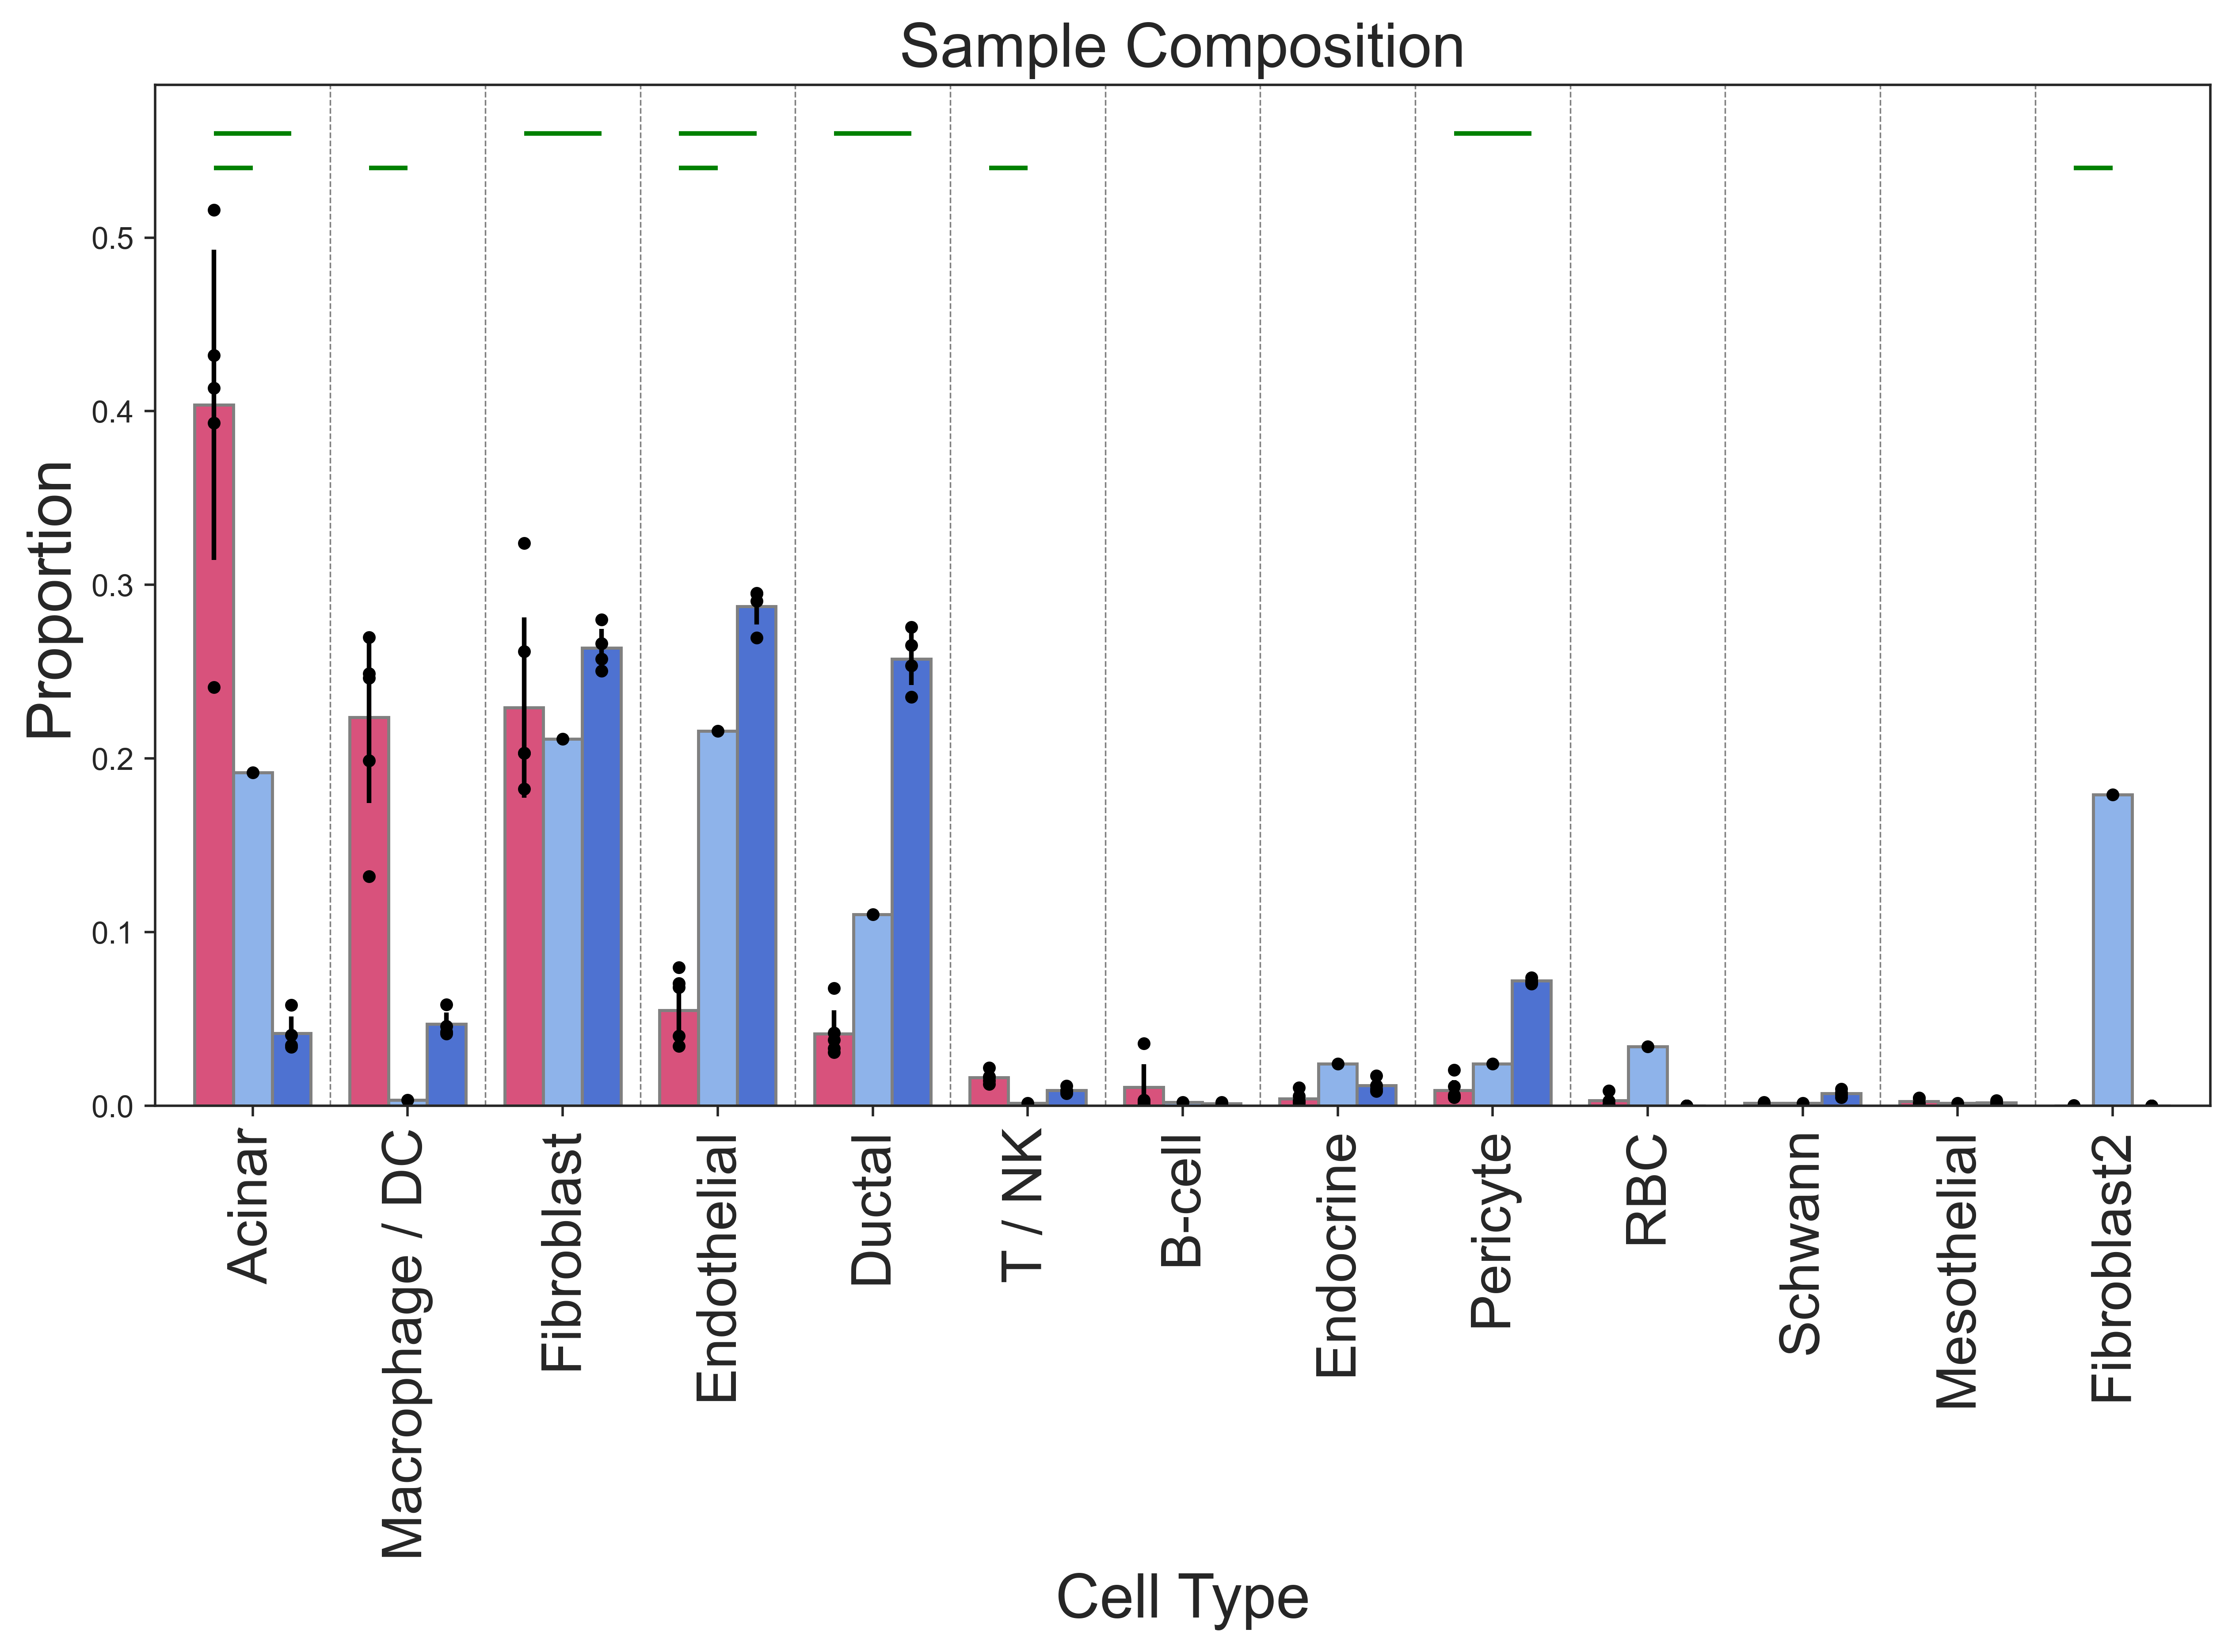

In [ ]:
# Set position of bar on X axis
from matplotlib import pyplot as plt
barWidth = 0.25
fig = plt.subplots(figsize =(12, 6))
br1 = np.arange(len(df2T))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, df2T['FixNCut'], yerr=[np.std(df1f[yi]) for yi in df1f.columns], color ='#D8527C', width = barWidth,
        edgecolor ='grey', label ='FixNCut')
plt.bar(br2, df2T['GSE180212'], yerr=[np.std(df1p[yi]) for yi in df1p.columns], color = '#8EB3EA', width = barWidth,
        edgecolor ='grey', label ='GSE180212')
plt.bar(br3, df2T['GSE141017'], yerr=[np.std(df1s[yi]) for yi in df1s.columns], color ='#4E72D1', width = barWidth,
        edgecolor ='grey', label ='GSE141017')

for c in df1f.columns:
  plt.scatter(x=[c,c,c,c,c], y=df1f[c],s=10,color='black')
a=0
for d in df1p.columns:
  plt.scatter(x=a+0.25, y=df1p[d],s=10,color='black')
  a=a+1

a=0
for e in df1s.columns:
  f=a+0.5
  plt.scatter(x=[f,f,f,f], y=df1s[e],s=10,color='black')
  a=a+1

# Adding Xticks
plt.xticks([r + barWidth for r in range(len(df2T))],
        df1.columns, rotation=90,fontsize=18)

plt.xlabel("Cell Type",fontsize=20)
plt.ylabel("Proportion",fontsize=20)
plt.title("Sample Composition",fontsize=20)

plt.hlines(0.54, 0, 0.25, color='green')
plt.hlines(0.56, 0, 0.5, color='green')
plt.hlines(0.54, 1, 1.25, color='green')


plt.hlines(0.56, 2, 2.5, color='green')

plt.hlines(0.56, 3, 3.5, color='green')
plt.hlines(0.54, 3, 3.25, color='green')
plt.hlines(0.56, 4, 4.5, color='green')
plt.hlines(0.54, 5, 5.25, color='green')


plt.hlines(0.56, 8, 8.5, color='green')
plt.hlines(0.54, 12, 12.25, color='green')


for x in (0.75, 1.75, 2.75, 3.75, 4.75, 5.75, 6.75, 7.75, 8.75, 9.75, 10.75, 11.75):
  plt.axvline(x=x, linestyle='--', linewidth=0.5, color='grey')

plt.margins(x=0.02)
#plt.legend()
plt.show()

In [ ]:
data_scanpy_1.obs

,sample,condition
donor,,
control_1,FixNCut,Control
control_2,FixNCut,Control
control_3,FixNCut,Control
control_4,FixNCut,Control
control_5,FixNCut,Control
P_1,Protocol1,Control
S_1,Protocol2,Control
S_2,Protocol2,Control
S_3,Protocol2,Control


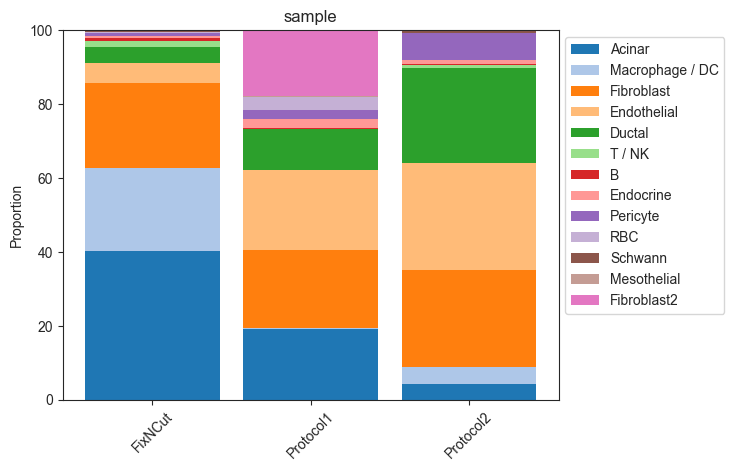

In [ ]:
# Stacked barplot for the levels of "Condition"
viz.stacked_barplot(data_scanpy_1, feature_name="sample")
pl.show()